In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
import math
from random import randint
from scipy.stats import multivariate_normal
from matplotlib import cm

#Most code from: https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/


In [3]:
def generate_gaus():
    x = np.linspace(-1, 4, 100)
    y = np.linspace(-1, 4, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    mu = np.array([x1_mean.value, x2_mean.value])
    cov = np.array([[cov_x00.value, cov_x01.value],[cov_x01.value, cov_x11.value]])
    rv = multivariate_normal(mu, cov)
    Z = rv.pdf(pos)
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.15,0.2)
    ax.set_zticks(np.linspace(0,0.2,5))
    ax.view_init(27, -21)
    fig.show()
    

In [4]:

x1_mean = widgets.FloatSlider(description='x1 mean:',value=1,min=-1,max=3,step=0.1)
x2_mean = widgets.FloatSlider(description='x2 mean:',value=1,min=-1,max=3,step=0.1)
cov_x00 = widgets.FloatSlider(description='conv x00',value=.5,min=0,max=2,step=0.01)
cov_x01 = widgets.FloatSlider(description='conv x01',value=.25,min=-1,max=2,step=0.01)
#cov_x10 = widgets.FloatSlider(description='conv x10',value=.25,min=-1,max=1,step=0.1)
cov_x11 = widgets.FloatSlider(description='conv x11',value=.5,min=0,max=2,step=0.01)
box = widgets.VBox([x1_mean, x2_mean, cov_x00, cov_x01, cov_x11])
box

C:\Users\zeusg\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


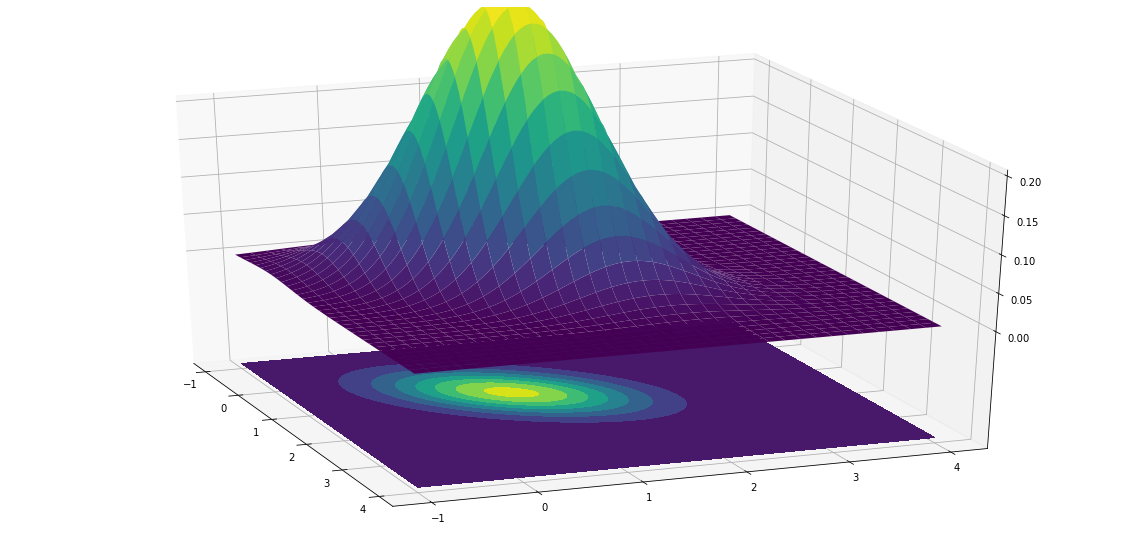

In [5]:
generate_gaus()


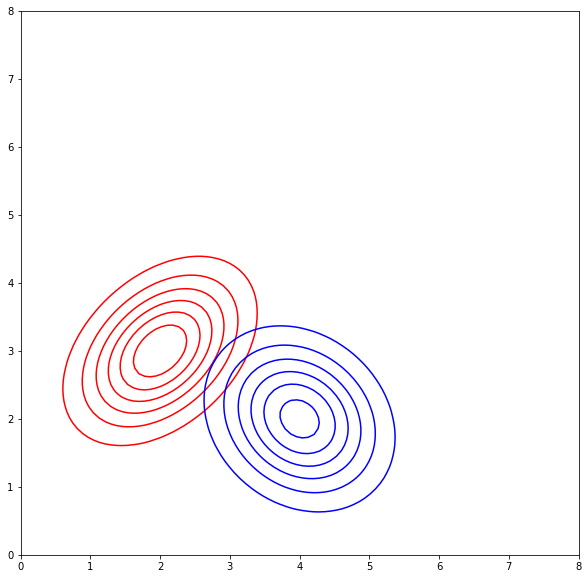

In [19]:
#Create 2 contor maps 

x = np.linspace(0, 8, 100)
y = np.linspace(0, 8, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu1 = np.array([2, 3])
cov1 = np.array([[.5, .2],[.2, .5]])
rv1 = multivariate_normal(mu1, cov1)
Z1 = rv1.pdf(pos)

mu2 = np.array([4, 2])
cov2 = np.array([[.5, -.1],[-.1, .5]])
rv2 = multivariate_normal(mu2, cov2)
Z2 = rv2.pdf(pos)

fig = plt.figure(figsize=(10,10))

#ax = fig.add_subplot(111)
plt.contour(X, Y, Z1, colors='red')
plt.contour(X, Y, Z2, colors='blue')

plt.show()
#Z2
#Z = np.concatenate(Z1, Z2)
#Z